### Numerical Data


In [38]:
## random sample imputation on numerical data

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [8]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [10]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [17]:
x_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [19]:
# create another copy of data formimputation for preserving previoud data
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']

In [21]:
x_train.head(5)

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [22]:
x_test.head(5)

,Age,Fare,Age_imputed
707,42.0,26.2875,42.0
37,21.0,8.0500,21.0
615,24.0,65.0000,24.0
169,28.0,56.4958,28.0
68,17.0,7.9250,17.0


In [26]:
import numpy as np

# Get the non-null 'Age' values from x_train
non_null_age_values = x_train['Age'].dropna()

# Sample the non-null age values to match the number of null values in 'Age_imputed'
sampled_age_values = non_null_age_values.sample(x_train['Age_imputed'].isnull().sum(), replace=True, random_state=42)

# Fill the null values in 'Age_imputed' with the sampled values
x_train['Age_imputed'].fillna(sampled_age_values, inplace=True)
x_test['Age_imputed'].fillna(sampled_age_values, inplace=True)


In [27]:
x_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,38.0
493,71.0,49.5042,71.0
527,NaN,221.7792,28.0


C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_4492\3380634168.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='original',hist=False)
C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_4492\3380634168.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_trai

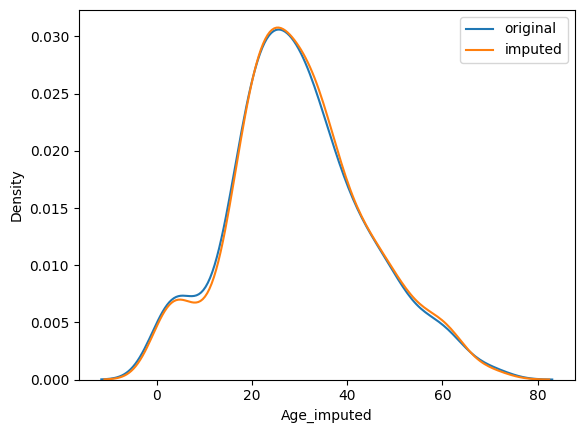

In [32]:
sns.distplot(x_train['Age'],label='original',hist=False)
sns.distplot(x_train['Age_imputed'],label='imputed',hist=False)

plt.legend()
plt.show()

##almost same distribution

In [34]:
print("original variable variance",x_train['Age'].var())
print("variance after random imputation",x_train['Age_imputed'].var())

original variable variance 204.3495133904614
variance after random imputation 200.96938685168095


In [35]:
x_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,53.094533
Age,71.512440,204.349513,204.349513
Age_imputed,53.094533,204.349513,200.969387


<Axes: >

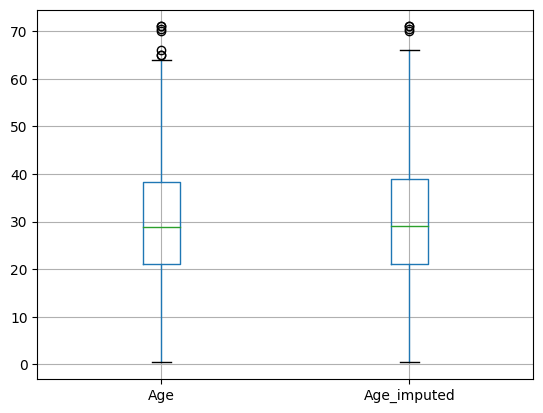

In [37]:
x_train[['Age','Age_imputed']].boxplot() ##same as bofare

In [ ]:
#due to random selection output is change for same input during production so so 
# to avoid in this we set fixed value for age for same fare according to below

##sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

## Categorical data

In [41]:
data=pd.read_csv("house.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [43]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [45]:
data.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [47]:
x=data
y=data['SalePrice']

In [52]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [53]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [56]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
265,TA,TA,175500,TA,TA
126,TA,TA,128000,TA,TA
933,NaN,TA,190000,TA,NaN
1239,Gd,TA,265900,TA,Gd
153,Gd,TA,235000,TA,Gd


In [58]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_4492\856878696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_4492\856878696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values
C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_4492\856878696.py:4: SettingWithCopyWarning: 
A

In [66]:
temp=pd.concat([
    X_train['GarageQual'].value_counts()/len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts()/len(X_train)
    
    
],axis=1)

temp.columns=['original','imputed']

In [68]:
temp

#not more changes

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [69]:
temp=pd.concat([
    X_train['FireplaceQu'].value_counts()/len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu'].value_counts()/len(X_train)
    
    
],axis=1)

temp.columns=['original','imputed']

In [70]:
temp

# very big difference because more values are missing

,original,imputed
Gd,0.494272,0.258562
TA,0.412439,0.215753
Fa,0.040917,0.021404
Po,0.027823,0.014555
Ex,0.024550,0.012842


C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_4492\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\AKSHATA\AppData\Local\Temp\ipykernel_4492\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

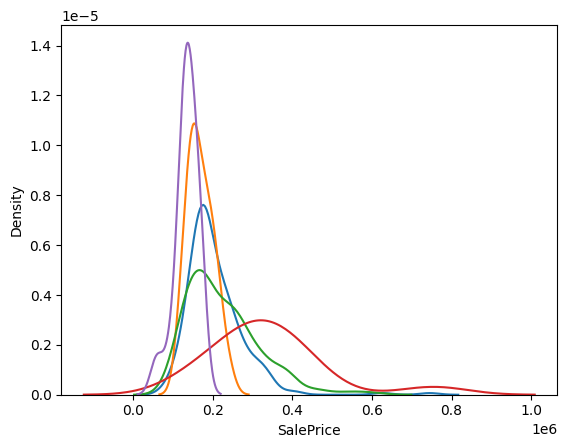

In [71]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()